In [43]:
from meteostat import Daily, Point, Stations
from datetime import datetime
import numpy as np

In [19]:
stations = Stations()
stations.id('KBDU0')
stations.fetch(1)

AttributeError: 'Stations' object has no attribute 'id'

In [72]:
start = datetime(1940,12,23)
end = datetime(2021, 12, 23)

#louisville
stations = ['72469', 'KBDU0', 'KEIK0','KBJC0']

#denver
#stations = ['72469', '72565', 'KBKF0','KBJC0']

data = []
for station in stations:
    data.append(Daily(station, start, end).fetch())
    

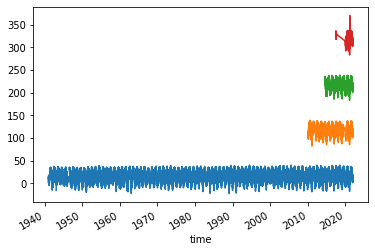

In [73]:
offset = 0

for d in data:
    (d.tmax+offset).plot()
    offset+=100

In [80]:
la_nina_moderate = [1955,1970,1995,2011,2020]
la_nina_strong = [1973,1975,1988,1998,1999,2007,2010]

el_nino_moderate = [1951,1963,1968,1986,1993,2002,2009]
el_nino_very_strong = [1982,1997,2015]
el_nino_strong = [1957,1965,1972,1987,1991]

#to improve this and code below, make a k:v dict instead so that its faster to iterate
#could also scrape this: https://ggweather.com/enso/oni.htm

ocean_behavior = {'la_nina_moderate' : [1955,1970,1995,2011,2020],
                  'la_nina_strong':[1973,1975,1988,1998,1999,2007,2010],
                  'el_nino_moderate':[1951,1963,1968,1986,1993,2002,2009],
                  'el_nino_strong':[1957,1965,1972,1987,1991],
                  'el_nino_very_strong':[1982,1997,2015]}

In [81]:
data = Daily(stations[0], start, end).fetch()

for col_name, years in ocean_behavior.items():
    data[col_name] = 0
    for year in years:
        data.loc[np.logical_and(data.index > datetime(year,6,1), data.index < datetime(year + 1, 6, 1)), col_name]  = 1
    

In [86]:
data.loc[data.la_nina_moderate>0].index

DatetimeIndex(['1955-06-02', '1955-06-03', '1955-06-04', '1955-06-05',
               '1955-06-06', '1955-06-07', '1955-06-08', '1955-06-09',
               '1955-06-10', '1955-06-11',
               ...
               '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
               '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
               '2021-05-30', '2021-05-31'],
              dtype='datetime64[ns]', name='time', length=1823, freq=None)

In [90]:
'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=ZIP:28801&startdate=2010-05-01&enddate=2010-05-01'


def generate_url(start_date, end_date, zip = 80027):
    return f'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=ZIP:{zip}&startdate={start_date}&enddate={end_date}'
    

In [98]:
url = generate_url('1980-05-01', '2010-05-01',zip = 80301)

out = make_request(url = url)

out.raise_for_status()

out.json()

HTTPError: 400 Client Error:  for url: https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=ZIP:80301&startdate=1980-05-01&enddate=2010-05-01

In [100]:
r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=CITY:BOULDERCO&startdate=2010-05-01&enddate=2010-05-01', headers = {'token':TOKEN})
r.json()

{}

In [76]:
out.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [72]:
out.raise_for_status()

HTTPError: 400 Client Error:  for url: https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datsetid=GHCND&locationid=ZIP:80027&startdate=2008-12-21&enddate=2021-12-21